In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Input,Dense, SimpleRNN, Embedding, TimeDistributed, Bidirectional
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.models import Model

In [7]:
# preparing dataset

file1 = open("/content/NER_train.txt", "r")
X = [] # contains the words
Y = [] # contains corresponding tags
x = []
y = []
for i in file1:
  s = i.split(" ")
  if s[0]!='.' and len(s)==4:
    x.append(s[0])
    y.append(s[3][:-1])
  else:
    X.append(x)
    Y.append(y)
    x = []
    y = []
# print(X)
print(Y)

[['O'], ['I-ORG', 'O', 'I-MISC', 'O', 'O', 'O', 'I-MISC', 'O'], [], ['I-PER', 'I-PER'], ['I-LOC', 'O'], ['O', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], [], ['I-LOC', 'O', 'O', 'O', 'O', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O'], [], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'O', 'O', 'O', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O'], [], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'I-ORG'], [], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'O', 'O', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], [], ['I-PER', 'O',

In [8]:
unique_words = len(set([word.lower() for sentence in X for word in sentence]))
print(unique_words)

21009


In [9]:
# to find the different types of tags
total_tags   = len(set([word.lower() for sentence in Y for word in sentence]))
print(total_tags)

8


In [10]:
# code to vectorize X and Y

# encoding X
word_tokenizer = Tokenizer()              # instantiate tokeniser
word_tokenizer.fit_on_texts(X)            # fit tokeniser on data
# use the tokeniser to encode input sequence
X_encd = word_tokenizer.texts_to_sequences(X)  

# encoding Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encd = tag_tokenizer.texts_to_sequences(Y)

# look at first encoded data point

print('X: ', X_encd[1])
print('Y: ', Y_encd[1])

X:  [988, 10950, 204, 628, 5, 3938, 215, 5773]
Y:  [3, 1, 5, 1, 1, 1, 5, 1]


In [11]:
# check length of longest sentence
longest = [len(seq) for seq in X_encd]
print("longest sentence: {}".format(max(longest)))

longest sentence: 113


In [12]:
# Pad Sequences

# we set a particular sentence length (max_length)
# sentences longer than max_length - truncated from the back
# sentences shorter than max_length - padded with zeros in front

max_length = 90

X_padded = pad_sequences(X_encd, maxlen= max_length, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encd, maxlen= max_length, padding="pre", truncating="post")
# print the first sequence
print(X_padded[0])
print(Y_padded[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [13]:
# assign padded sequences to X and Y
X, Y = X_padded, Y_padded

In [14]:
# use Keras' to_categorical function to one-hot encode Y
Y = to_categorical(Y)
Y.shape

(22360, 90, 9)

In [15]:
# split entire data into training and testing sets
ts = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ts, random_state=5)

In [16]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train.shape

(19006, 90)

In [17]:
Y_train.shape

(19006, 90, 9)

In [18]:
# total number of tags
tot_tags = Y.shape[2]
tot_tags

9

In [21]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim = 21010, 
                           output_dim = 100,
                           input_length = 113,
                           trainable = False
))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation= 'sigmoid')))

bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu')))

bilstm_model.add(TimeDistributed(Dense(tot_tags, activation='softmax')))
#compile model
bilstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
# check summary of model
bilstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 113, 100)          2101000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 113, 128)          84480     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 113, 128)          98816     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 113, 128)          98816     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 113, 9)            1161      
Total params: 2,384,273
Trainable params: 283,273
Non-trainable params: 2,101,000
_________________________________________________________________


In [ ]:
bilstm_training = bilstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
149/149 [==============================] - 141s 895ms/step - loss: 0.6570 - acc: 0.8588 - val_loss: 0.2645 - val_acc: 0.9052
Epoch 2/10
149/149 [==============================] - 133s 890ms/step - loss: 0.2655 - acc: 0.9062 - val_loss: 0.2630 - val_acc: 0.9093
Epoch 3/10
149/149 [==============================] - 131s 879ms/step - loss: 1.4292 - acc: 0.8384 - val_loss: 0.3650 - val_acc: 0.9008
Epoch 4/10
149/149 [==============================] - 132s 883ms/step - loss: 1.3977 - acc: 0.8729 - val_loss: 1.5985 - val_acc: 0.9008
Epoch 5/10
149/149 [==============================] - 130s 875ms/step - loss: 1.5730 - acc: 0.9024 - val_loss: 1.5985 - val_acc: 0.9008
Epoch 6/10
149/149 [==============================] - 133s 890ms/step - loss: 1.5725 - acc: 0.9024 - val_loss: 1.5985 - val_acc: 0.9008
Epoch 7/10
149/149 [==============================] - 132s 888ms/step - loss: 1.5742 - acc: 0.9023 - val_loss: 1.5985 - val_acc: 0.9008
Epoch 8/10
149/149 [============================

In [23]:
bilstm_model.save('bilstm_model.bin')

INFO:tensorflow:Assets written to: bilstm_model.bin/assets


INFO:tensorflow:Assets written to: bilstm_model.bin/assets


In [24]:
bilstm_model.save_weights("BiLSTM_NER_model")

In [25]:
bilstm_training.history['acc']

[0.8955885171890259,
 0.9073333740234375,
 0.8781770467758179,
 0.8781285285949707,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327]

In [26]:
bilstm_training.history['val_acc']

[0.9051580429077148,
 0.9092692136764526,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961]

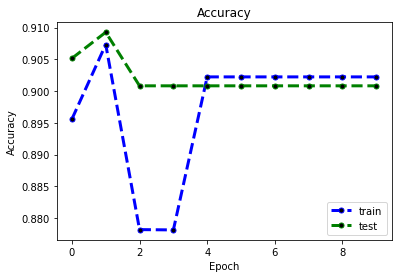

In [30]:
# visualise training history
plt.plot(bilstm_training.history['acc'], linestyle='dashed',color='blue',linewidth = 3, marker='o', markerfacecolor='black', markersize=5)
plt.plot(bilstm_training.history['val_acc'], linestyle='dashed',color='green', linewidth = 3, marker='o', markerfacecolor='black', markersize=5)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [31]:
loss, accuracy = bilstm_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: ",loss)
print("Accuracy: ", accuracy)

105/105 [==============================] - 7s 71ms/step - loss: 1.5985 - acc: 0.9008
Loss:  1.5984609127044678
Accuracy:  0.9008281826972961
